In [233]:
# import numpy as np 
# import pandas as pd 
# import seaborn as sns
# import matplotlib.pyplot as plt
# from datetime import datetime

In [234]:
players = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/players.csv')
clubs = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/clubs.csv')
valuations = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/player_valuations.csv')
games = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/games.csv')
lineup = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/game_lineups.csv')
club_games = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/club_games.csv')
game_events = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/game_events.csv')
appearances = pd.read_csv('C:/Users/parks/OneDrive/바탕 화면/DATASET/Football/appearances.csv')

In [235]:
# Players 테이블에서 필요없는 칼럼 제거
players = players.drop(['last_season', 'current_club_id', 'image_url', 'url', 'first_name', 'last_name', 'agent_name', 'city_of_birth', 'contract_expiration_date', 'market_value_in_eur'], axis=1)

In [236]:
players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur
0,10,Miroslav Klose,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,IT1,Società Sportiva Lazio S.p.A.,30000000.0
1,26,Roman Weidenfeller,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,L1,Borussia Dortmund,8000000.0
2,65,Dimitar Berbatov,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,34500000.0
3,77,Lúcio,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,NaN,NaN,IT1,Juventus Football Club,24500000.0
4,80,Tom Starke,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,L1,FC Bayern München,3000000.0


In [237]:
# 프리미어리그만 선택
players = players[players['current_club_domestic_competition_id'] == 'GB1']

In [238]:
# Valuations 에서 필요없는 칼럼 제거
valuations = valuations.drop(['player_club_domestic_competition_id'], axis=1)

In [239]:
valuations.head()

,player_id,date,market_value_in_eur,current_club_id
0,405973,2000-01-20,150000,3057
1,342216,2001-07-20,100000,1241
2,3132,2003-12-09,400000,126
3,6893,2003-12-15,900000,984
4,10,2004-10-04,7000000,398


In [240]:
#선수 몸값 변경 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (valuations['date'] >= start_date) & (valuations['date'] <= end_date)
valuations = valuations.loc[mask]

In [241]:
valuations = valuations.rename(columns={'date' : 'valuations_date'})

In [242]:
# Players + Valuations 테이블 결합
df_players = pd.merge(players, valuations, on='player_id')

In [243]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15067 entries, 0 to 15066
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             15067 non-null  int64  
 1   name                                  15067 non-null  object 
 2   player_code                           15067 non-null  object 
 3   country_of_birth                      14613 non-null  object 
 4   country_of_citizenship                14730 non-null  object 
 5   date_of_birth                         15067 non-null  object 
 6   sub_position                          15064 non-null  object 
 7   position                              15067 non-null  object 
 8   foot                                  14799 non-null  object 
 9   height_in_cm                          14912 non-null  float64
 10  current_club_domestic_competition_id  15067 non-null  object 
 11  current_club_na

In [244]:
# 결측치 확인
df_players.isnull().sum()

player_id                                 0
name                                      0
player_code                               0
country_of_birth                        454
country_of_citizenship                  337
date_of_birth                             0
sub_position                              3
position                                  0
foot                                    268
height_in_cm                            155
current_club_domestic_competition_id      0
current_club_name                         0
highest_market_value_in_eur               0
valuations_date                           0
market_value_in_eur                       0
current_club_id                           0
dtype: int64

In [245]:
df_players.head()

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,highest_market_value_in_eur,valuations_date,market_value_in_eur,current_club_id
0,2514,Bastian Schweinsteiger,bastian-schweinsteiger,Germany,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,GB1,Manchester United Football Club,40000000.0,2018-12-15,2500000,985
1,2514,Bastian Schweinsteiger,bastian-schweinsteiger,Germany,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,GB1,Manchester United Football Club,40000000.0,2019-05-27,2500000,985
2,2514,Bastian Schweinsteiger,bastian-schweinsteiger,Germany,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,GB1,Manchester United Football Club,40000000.0,2019-11-18,1000000,985
3,2857,Eldin Jakupovic,eldin-jakupovic,Jugoslawien (SFR),Switzerland,1984-10-02,Goalkeeper,Goalkeeper,right,191.0,GB1,Everton Football Club,1500000.0,2018-12-19,1000000,29
4,2857,Eldin Jakupovic,eldin-jakupovic,Jugoslawien (SFR),Switzerland,1984-10-02,Goalkeeper,Goalkeeper,right,191.0,GB1,Everton Football Club,1500000.0,2019-06-13,750000,29


In [246]:
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


In [247]:
appearances = appearances[appearances['competition_id'] == 'GB1']

In [248]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123609 entries, 6836 to 1555970
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   appearance_id           123609 non-null  object
 1   game_id                 123609 non-null  int64 
 2   player_id               123609 non-null  int64 
 3   player_club_id          123609 non-null  int64 
 4   player_current_club_id  123609 non-null  int64 
 5   date                    123609 non-null  object
 6   player_name             123609 non-null  object
 7   competition_id          123609 non-null  object
 8   yellow_cards            123609 non-null  int64 
 9   red_cards               123609 non-null  int64 
 10  goals                   123609 non-null  int64 
 11  assists                 123609 non-null  int64 
 12  minutes_played          123609 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 13.2+ MB


In [249]:
#Appreances 필요없는 칼럼 삭제
appearances = appearances.drop(['player_current_club_id'], axis=1)

In [250]:
#경기 출전 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (appearances['date'] >= start_date) & (appearances['date'] <= end_date)
appearances = appearances.loc[mask]

In [251]:
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,GB1,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,GB1,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,GB1,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,GB1,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,GB1,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,GB1,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,GB1,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,GB1,0,0,0,0,45


In [252]:
appearances = appearances.rename(columns={'date' : 'appearances_date'})

In [253]:
df_players = pd.merge(df_players, appearances, on='player_id')

In [254]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673193 entries, 0 to 673192
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   player_id                             673193 non-null  int64  
 1   name                                  673193 non-null  object 
 2   player_code                           673193 non-null  object 
 3   country_of_birth                      659093 non-null  object 
 4   country_of_citizenship                659261 non-null  object 
 5   date_of_birth                         673193 non-null  object 
 6   sub_position                          673193 non-null  object 
 7   position                              673193 non-null  object 
 8   foot                                  672267 non-null  object 
 9   height_in_cm                          673166 non-null  float64
 10  current_club_domestic_competition_id  673193 non-null  object 
 11  

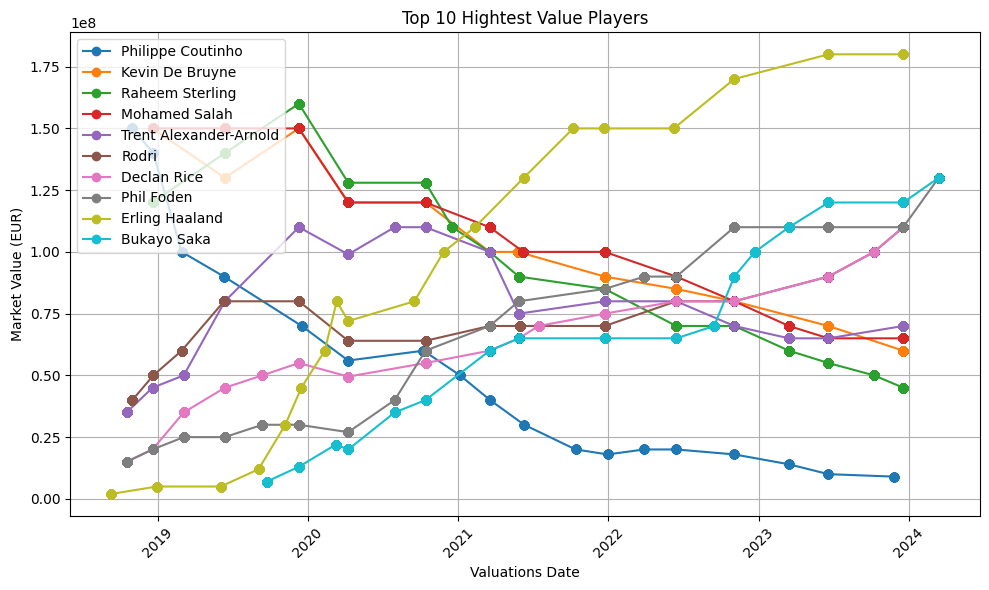

In [255]:
# valuations_date를 날짜 형식으로 변환
df_players['valuations_date'] = pd.to_datetime(df_players['valuations_date'])

# 각 선수의 최고 시장 가치 계산
highest_values = df_players.groupby(['player_id', 'player_name'])['market_value_in_eur'].max().nlargest(10)

# 최고 시장 가치를 기준으로 상위 5명의 선수 데이터 추출
top_players = df_players[df_players['player_id'].isin(highest_values.index.get_level_values(0))]

# 플롯 설정
plt.figure(figsize=(10, 6))

# 각 선수의 데이터를 그래프에 추가
for player_id, player_data in top_players.groupby('player_id'):
    player_name = player_data['player_name'].iloc[0]
    plt.plot(player_data['valuations_date'], player_data['market_value_in_eur'], marker='o', label=player_name)

# 그래프 스타일 및 레이블 설정
plt.xlabel('Valuations Date')
plt.ylabel('Market Value (EUR)')
plt.title('Top 10 Hightest Value Players')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

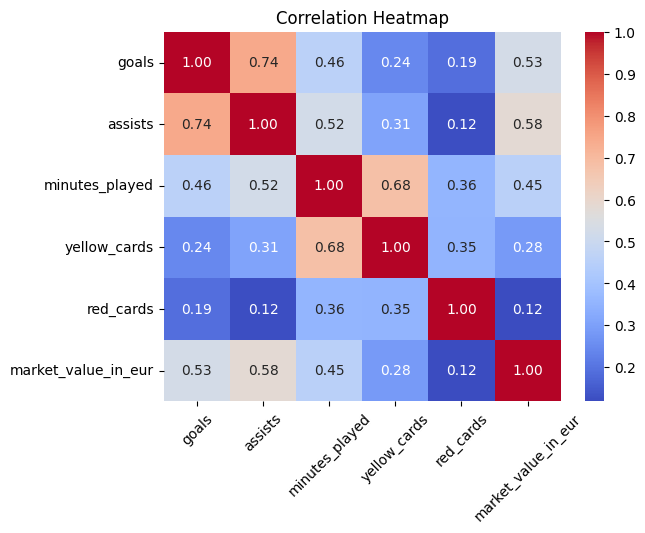

In [256]:
#DataFrame 새로 만들기
df_plyaers_test = pd.DataFrame(df_players)

# Goals, Assists, Minutes Played를 따로 구함
df_plyaers_test['goals'] = df_players.groupby('player_id')['goals'].transform('sum')
df_plyaers_test['assists'] = df_players.groupby('player_id')['assists'].transform('sum')
df_plyaers_test['minutes_played'] = df_players.groupby('player_id')['minutes_played'].transform('sum')
df_plyaers_test['yellow_cards'] = df_players.groupby('player_id')['yellow_cards'].transform('sum')
df_plyaers_test['red_cards'] = df_players.groupby('player_id')['red_cards'].transform('sum')

# 상관 계수 계산
correlation_matrix = df_plyaers_test[['goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards','market_value_in_eur']].corr()

# 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [257]:
df_players.head()
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673193 entries, 0 to 673192
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             673193 non-null  int64         
 1   name                                  673193 non-null  object        
 2   player_code                           673193 non-null  object        
 3   country_of_birth                      659093 non-null  object        
 4   country_of_citizenship                659261 non-null  object        
 5   date_of_birth                         673193 non-null  object        
 6   sub_position                          673193 non-null  object        
 7   position                              673193 non-null  object        
 8   foot                                  672267 non-null  object        
 9   height_in_cm                          673166 non-null  floa

In [258]:
df_players

,player_id,name,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,...,game_id,player_club_id,appearances_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,3333,James Milner,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,175.0,...,3050171,31,2018-08-12,James Milner,GB1,0,0,0,1,90
1,3333,James Milner,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,175.0,...,3050181,31,2018-08-20,James Milner,GB1,0,0,1,0,67
2,3333,James Milner,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,175.0,...,3050191,31,2018-08-25,James Milner,GB1,0,0,0,0,90
3,3333,James Milner,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,175.0,...,3050203,31,2018-09-01,James Milner,GB1,1,0,0,1,90
4,3333,James Milner,james-milner,England,England,1986-01-04,Central Midfield,Midfield,right,175.0,...,3050214,31,2018-09-15,James Milner,GB1,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673188,1005649,Murillo,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,...,4095353,703,2024-03-10,Murillo,GB1,0,0,0,0,90
673189,1005649,Murillo,murillo,Brazil,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,...,4095366,703,2024-03-16,Murillo,GB1,0,0,0,0,90
673190,1082850,Deivid Washington,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,...,4095170,631,2023-10-28,Deivid Washington,GB1,0,0,0,0,9
673191,1082850,Deivid Washington,deivid-washington,Brazil,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,...,4095170,631,2023-10-28,Deivid Washington,GB1,0,0,0,0,9


In [259]:
games = games[games['competition_id'] == 'GB1']

In [260]:
games = games.drop(['season', 'round', 'url', 'competition_type', 'stadium', 'aggregate', 'home_club_name', 'away_club_name', 'competition_id'], axis = 1)

In [261]:
games.head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation
24,2332021,2013-12-21,984,3008,1,1,16.0,12.0,Keith Downing,Steve Bruce,24753.0,Jonathan Moss,4-2-3-1,5-3-2
25,2332050,2013-12-04,289,631,3,4,20.0,2.0,Gustavo Poyet,José Mourinho,40652.0,Phil Dowd,4-1-4-1,4-2-3-1
26,2332053,2013-11-30,379,931,3,0,15.0,18.0,Sam Allardyce,Martin Jol,34946.0,Martin Atkinson,4-2-3-1,4-4-1-1
27,2332188,2014-01-28,180,11,2,2,9.0,2.0,Mauricio Pochettino,Arsène Wenger,31284.0,Lee Mason,4-2-3-1,4-2-3-1
28,2332235,2014-01-28,873,3008,1,0,14.0,13.0,Tony Pulis,Steve Bruce,22519.0,Roger East,4-4-2 double 6,3-5-2 flat


In [262]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4463 entries, 24 to 67316
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 4463 non-null   int64  
 1   date                    4463 non-null   object 
 2   home_club_id            4463 non-null   int64  
 3   away_club_id            4463 non-null   int64  
 4   home_club_goals         4463 non-null   int64  
 5   away_club_goals         4463 non-null   int64  
 6   home_club_position      4463 non-null   float64
 7   away_club_position      4463 non-null   float64
 8   home_club_manager_name  4463 non-null   object 
 9   away_club_manager_name  4463 non-null   object 
 10  attendance              4008 non-null   float64
 11  referee                 4463 non-null   object 
 12  home_club_formation     4083 non-null   object 
 13  away_club_formation     4083 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory u

In [263]:
#게임 날짜 2018 ~ 2024까지
start_date = '2018-08-01'
end_date = '2024-12-31'
mask = (games['date'] >= start_date) & (games['date'] <= end_date)
games = games.loc[mask]

In [264]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 2183 non-null   int64  
 1   date                    2183 non-null   object 
 2   home_club_id            2183 non-null   int64  
 3   away_club_id            2183 non-null   int64  
 4   home_club_goals         2183 non-null   int64  
 5   away_club_goals         2183 non-null   int64  
 6   home_club_position      2183 non-null   float64
 7   away_club_position      2183 non-null   float64
 8   home_club_manager_name  2183 non-null   object 
 9   away_club_manager_name  2183 non-null   object 
 10  attendance              1728 non-null   float64
 11  referee                 2183 non-null   object 
 12  home_club_formation     2183 non-null   object 
 13  away_club_formation     2183 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory

In [265]:
games['attendance'] = games['attendance'].fillna(0)

In [266]:
games['attendance']

1876     24121.0
1877     20537.0
1878     40721.0
1879     30736.0
1880     30997.0
          ...   
66901    29402.0
66913        0.0
66914        0.0
67152        0.0
67160    61729.0
Name: attendance, Length: 2183, dtype: float64

In [267]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 2183 non-null   int64  
 1   date                    2183 non-null   object 
 2   home_club_id            2183 non-null   int64  
 3   away_club_id            2183 non-null   int64  
 4   home_club_goals         2183 non-null   int64  
 5   away_club_goals         2183 non-null   int64  
 6   home_club_position      2183 non-null   float64
 7   away_club_position      2183 non-null   float64
 8   home_club_manager_name  2183 non-null   object 
 9   away_club_manager_name  2183 non-null   object 
 10  attendance              2183 non-null   float64
 11  referee                 2183 non-null   object 
 12  home_club_formation     2183 non-null   object 
 13  away_club_formation     2183 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory

In [268]:
lineup

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0
...,...,...,...,...,...,...,...,...,...,...
2145217,8f1390a3d67394d1387061e3e8d8b33a,2023-05-24,4080529,543771,46,Kristjan Asllani,substitutes,Defensive Midfield,14,0
2145218,6038e2ed925b06aed10a1a5ee017cf1a,2023-05-24,4080529,602124,430,Alessandro Bianco,substitutes,Central Midfield,42,0
2145219,59961ac7781642d465167882867b65a8,2023-05-24,4080529,780136,46,Aleksandar Stanković,substitutes,Defensive Midfield,50,0
2145220,ea8baaec103816bbdff7ba7703ad4d9e,2023-05-24,4080529,969192,46,Ebenezer Akinsanmiro,substitutes,Attacking Midfield,43,0


In [269]:
lineup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145222 entries, 0 to 2145221
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   game_lineups_id  object
 1   date             object
 2   game_id          int64 
 3   player_id        int64 
 4   club_id          int64 
 5   player_name      object
 6   type             object
 7   position         object
 8   number           object
 9   team_captain     int64 
dtypes: int64(4), object(6)
memory usage: 163.7+ MB


In [270]:
lineup = lineup.drop(['game_lineups_id','player_name','number','date'], axis=1)

In [271]:
df_games = pd.merge(games, lineup, on='game_id')

In [272]:
df_games.head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
0,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,19948,631,substitutes,Goalkeeper,0
1,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,46741,631,starting_lineup,Centre-Back,0
2,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,48870,1110,substitutes,Goalkeeper,0
3,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,50202,631,substitutes,Left Winger,0
4,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,52059,1110,starting_lineup,Centre-Back,0


In [273]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72703 entries, 0 to 72702
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 72703 non-null  int64  
 1   date                    72703 non-null  object 
 2   home_club_id            72703 non-null  int64  
 3   away_club_id            72703 non-null  int64  
 4   home_club_goals         72703 non-null  int64  
 5   away_club_goals         72703 non-null  int64  
 6   home_club_position      72703 non-null  float64
 7   away_club_position      72703 non-null  float64
 8   home_club_manager_name  72703 non-null  object 
 9   away_club_manager_name  72703 non-null  object 
 10  attendance              72703 non-null  float64
 11  referee                 72703 non-null  object 
 12  home_club_formation     72703 non-null  object 
 13  away_club_formation     72703 non-null  object 
 14  player_id               72703 non-null

In [274]:
clubs = clubs[clubs['domestic_competition_id'] == 'GB1']

In [275]:
clubs.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
23,603,cardiff-city,Cardiff City,GB1,NaN,28,25.5,24,85.7,8,Cardiff City Stadium,33280,€-655k,NaN,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/cardiff-city/s...
30,989,afc-bournemouth,Association Football Club Bournemouth,GB1,NaN,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...
42,3008,hull-city,Hull City,GB1,NaN,28,25.0,17,60.7,6,MKM Stadium,25586,+€7.50m,NaN,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/hull-city/star...
43,31,fc-liverpool,Liverpool Football Club,GB1,NaN,28,25.6,21,75.0,18,Anfield,54074,€-111.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...


In [276]:
clubs = clubs.drop(['club_code','total_market_value','coach_name','filename', 'url', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'domestic_competition_id'], axis=1)

In [277]:
clubs

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
85,1003,Leicester City,25,27.1,14,56.0,11,2022
86,1237,Brighton and Hove Albion Football Club,27,25.5,19,70.4,16,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [278]:
club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134842 entries, 0 to 134841
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                134842 non-null  int64  
 1   club_id                134842 non-null  int64  
 2   own_goals              134842 non-null  int64  
 3   own_position           94898 non-null   float64
 4   own_manager_name       133350 non-null  object 
 5   opponent_id            134842 non-null  int64  
 6   opponent_goals         134842 non-null  int64  
 7   opponent_position      94898 non-null   float64
 8   opponent_manager_name  133350 non-null  object 
 9   hosting                134842 non-null  object 
 10  is_win                 134842 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 11.3+ MB


In [279]:
club_games.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0


In [280]:
df_club = pd.merge

In [281]:
df_games[df_games['game_id'] == 3050170]

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
0,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,19948,631,substitutes,Goalkeeper,0
1,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,46741,631,starting_lineup,Centre-Back,0
2,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,48870,1110,substitutes,Goalkeeper,0
3,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,50202,631,substitutes,Left Winger,0
4,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,52059,1110,starting_lineup,Centre-Back,0
5,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,52769,631,starting_lineup,Left Winger,0
6,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,55125,1110,starting_lineup,Left Midfield,0
7,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,57500,631,starting_lineup,Right-Back,1
8,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,57842,1110,starting_lineup,Centre-Back,0
9,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,59866,631,substitutes,Right Winger,0


In [282]:
club_games[club_games['game_id'] == 3050170]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
2097,3050170,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0
69518,3050170,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,1


In [283]:
df_games.head()

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation,player_id,club_id,type,position,team_captain
0,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,19948,631,substitutes,Goalkeeper,0
1,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,46741,631,starting_lineup,Centre-Back,0
2,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,48870,1110,substitutes,Goalkeeper,0
3,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,50202,631,substitutes,Left Winger,0
4,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking,52059,1110,starting_lineup,Centre-Back,0


In [284]:
home_club_games = games[['game_id', 'date', 'home_club_id', 'home_club_goals', 'home_club_position', 'home_club_manager_name', 'attendance', 'referee', 'home_club_formation']]

In [285]:
home_club_games.head()

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation
1876,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat
1877,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2
1878,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking
1879,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6
1880,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2


In [286]:
away_club_games = games[['game_id', 'date', 'away_club_id', 'away_club_goals', 'away_club_position', 'away_club_manager_name', 'attendance', 'referee', 'away_club_formation']]

In [287]:
away_club_games.head()

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation
1876,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking
1877,3050215,2018-09-15,985,2,8.0,José Mourinho,20537.0,Mike Dean,4-2-3-1
1878,3050250,2018-10-20,985,2,10.0,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking
1879,3050264,2018-10-27,762,0,19.0,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6
1880,3050336,2018-12-15,989,0,11.0,Eddie Howe,30997.0,Simon Hooper,3-4-2-1


In [288]:
club_games[club_games['game_id'] == 3050170]

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
2097,3050170,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0
69518,3050170,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,1


In [289]:
home_club_games = pd.merge(home_club_games, club_games, left_on=['game_id', 'home_club_id'], right_on=['game_id', 'club_id'], how='inner')

In [290]:
home_club_games

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0
1,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,0
2,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,0
3,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,180,0,16.0,Mark Hughes,762,0,19.0,Rafael Benítez,Home,0
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,543,2,7.0,Nuno Espírito Santo,989,0,11.0,Eddie Howe,Home,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,603,2,18.0,Neil Warnock,1237,1,12.0,Chris Hughton,Home,1
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,148,2,3.0,José Mourinho,1237,1,16.0,Graham Potter,Home,1
2180,3429714,2021-02-06,1132,1,17.0,Sean Dyche,0.0,Anthony Taylor,4-4-2 double 6,1132,1,17.0,Sean Dyche,1237,1,15.0,Graham Potter,Home,0
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,1237,1,17.0,Graham Potter,148,0,5.0,José Mourinho,Home,1


In [291]:
home_club_games[home_club_games['home_club_id'] != home_club_games['club_id']]

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win


In [292]:
home_club_games = home_club_games.drop(['own_goals', 'own_position', 'own_manager_name','hosting', 'club_id'], axis=1)

In [293]:
home_club_games

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0
1,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,985,2,8.0,José Mourinho,0
2,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,985,2,10.0,José Mourinho,0
3,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,762,0,19.0,Rafael Benítez,0
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,0,11.0,Eddie Howe,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,1237,1,12.0,Chris Hughton,1
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,1237,1,16.0,Graham Potter,1
2180,3429714,2021-02-06,1132,1,17.0,Sean Dyche,0.0,Anthony Taylor,4-4-2 double 6,1237,1,15.0,Graham Potter,0
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,148,0,5.0,José Mourinho,1


In [294]:
away_club_games = pd.merge(away_club_games, club_games, left_on=['game_id', 'away_club_id'], right_on=['game_id', 'club_id'], how='inner')

In [295]:
away_club_games = away_club_games.drop(['own_goals', 'own_position', 'own_manager_name','hosting', 'club_id'], axis=1)

In [296]:
away_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 2183 non-null   int64  
 1   date                    2183 non-null   object 
 2   away_club_id            2183 non-null   int64  
 3   away_club_goals         2183 non-null   int64  
 4   away_club_position      2183 non-null   float64
 5   away_club_manager_name  2183 non-null   object 
 6   attendance              2183 non-null   float64
 7   referee                 2183 non-null   object 
 8   away_club_formation     2183 non-null   object 
 9   opponent_id             2183 non-null   int64  
 10  opponent_goals          2183 non-null   int64  
 11  opponent_position       2183 non-null   float64
 12  opponent_manager_name   2183 non-null   object 
 13  is_win                  2183 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memor

In [297]:
# date 열을 datetime 타입으로 변환
away_club_games['date'] = pd.to_datetime(away_club_games['date'])

In [298]:
# season을 나타내는 함수 정의
def get_season(date):
    year = date.year
    month = date.month
    
    if month >= 8 and month <= 12:
        return year
    elif month >= 1 and month <= 5:
        return year - 1
    else:
        return year - 1
    
# date를 기반으로 season 칼럼 생성
away_club_games['season'] = away_club_games['date'].apply(get_season)

In [299]:
away_club_games.head()

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018
1,3050215,2018-09-15,985,2,8.0,José Mourinho,20537.0,Mike Dean,4-2-3-1,1010,1,4.0,Javi Gracia,1,2018
2,3050250,2018-10-20,985,2,10.0,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,0,2018
3,3050264,2018-10-27,762,0,19.0,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,180,0,16.0,Mark Hughes,0,2018
4,3050336,2018-12-15,989,0,11.0,Eddie Howe,30997.0,Simon Hooper,3-4-2-1,543,2,7.0,Nuno Espírito Santo,0,2018


In [300]:
home_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 2183 non-null   int64  
 1   date                    2183 non-null   object 
 2   home_club_id            2183 non-null   int64  
 3   home_club_goals         2183 non-null   int64  
 4   home_club_position      2183 non-null   float64
 5   home_club_manager_name  2183 non-null   object 
 6   attendance              2183 non-null   float64
 7   referee                 2183 non-null   object 
 8   home_club_formation     2183 non-null   object 
 9   opponent_id             2183 non-null   int64  
 10  opponent_goals          2183 non-null   int64  
 11  opponent_position       2183 non-null   float64
 12  opponent_manager_name   2183 non-null   object 
 13  is_win                  2183 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memor

In [301]:
# date 열을 datetime 타입으로 변환
home_club_games['date'] = pd.to_datetime(home_club_games['date'])

# season을 나타내는 함수 정의
def get_season(date):
    year = date.year
    month = date.month
    
    if month >= 8 and month <= 12:
        return year
    elif month >= 1 and month <= 5:
        return year - 1
    else:
        return year - 1
    
# date를 기반으로 season 칼럼 생성
home_club_games['season'] = home_club_games['date'].apply(get_season)

In [302]:
home_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   date                    2183 non-null   datetime64[ns]
 2   home_club_id            2183 non-null   int64         
 3   home_club_goals         2183 non-null   int64         
 4   home_club_position      2183 non-null   float64       
 5   home_club_manager_name  2183 non-null   object        
 6   attendance              2183 non-null   float64       
 7   referee                 2183 non-null   object        
 8   home_club_formation     2183 non-null   object        
 9   opponent_id             2183 non-null   int64         
 10  opponent_goals          2183 non-null   int64         
 11  opponent_position       2183 non-null   float64       
 12  opponent_manager_name   2183 non-null   object  

In [303]:
away_club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   date                    2183 non-null   datetime64[ns]
 2   away_club_id            2183 non-null   int64         
 3   away_club_goals         2183 non-null   int64         
 4   away_club_position      2183 non-null   float64       
 5   away_club_manager_name  2183 non-null   object        
 6   attendance              2183 non-null   float64       
 7   referee                 2183 non-null   object        
 8   away_club_formation     2183 non-null   object        
 9   opponent_id             2183 non-null   int64         
 10  opponent_goals          2183 non-null   int64         
 11  opponent_position       2183 non-null   float64       
 12  opponent_manager_name   2183 non-null   object  

In [304]:
clubs

,club_id,name,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,last_season
4,148,Tottenham Hotspur Football Club,26,25.4,20,76.9,21,2023
23,603,Cardiff City,28,25.5,24,85.7,8,2018
30,989,Association Football Club Bournemouth,26,25.8,17,65.4,12,2023
42,3008,Hull City,28,25.0,17,60.7,6,2016
43,31,Liverpool Football Club,28,25.6,21,75.0,18,2023
59,1010,Watford FC,30,26.3,24,80.0,12,2021
85,1003,Leicester City,25,27.1,14,56.0,11,2022
86,1237,Brighton and Hove Albion Football Club,27,25.5,19,70.4,16,2023
135,703,Nottingham Forest Football Club,28,26.9,24,85.7,16,2023
138,1031,Luton Town Football Club,28,27.5,16,57.1,10,2023


In [306]:
home_club_games = pd.merge(home_club_games, clubs[['club_id', 'name']], left_on='home_club_id', right_on='club_id', how='left')

In [309]:
home_club_games= home_club_games.drop(['club_id'], axis=1)

In [311]:
away_club_games = pd.merge(away_club_games, clubs[['club_id', 'name']], left_on='away_club_id', right_on='club_id', how='left')

In [313]:
away_club_games= away_club_games.drop(['club_id'], axis=1)

In [317]:
home_club_games

,game_id,date,home_club_id,home_club_goals,home_club_position,home_club_manager_name,attendance,referee,home_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,name
0,3050170,2018-08-11,1110,0,19.0,David Wagner,24121.0,Chris Kavanagh,3-5-2 flat,631,3,2.0,Maurizio Sarri,0,2018,Huddersfield Town
1,3050215,2018-09-15,1010,1,4.0,Javi Gracia,20537.0,Mike Dean,4-4-2,985,2,8.0,José Mourinho,0,2018,Watford FC
2,3050250,2018-10-20,631,2,3.0,Maurizio Sarri,40721.0,Mike Dean,4-3-3 Attacking,985,2,10.0,José Mourinho,0,2018,Chelsea Football Club
3,3050264,2018-10-27,180,0,16.0,Mark Hughes,30736.0,Chris Kavanagh,4-4-2 double 6,762,0,19.0,Rafael Benítez,0,2018,Southampton FC
4,3050336,2018-12-15,543,2,7.0,Nuno Espírito Santo,30997.0,Simon Hooper,3-5-2,989,0,11.0,Eddie Howe,1,2018,Wolverhampton Wanderers Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,603,2,18.0,Neil Warnock,29402.0,Martin Atkinson,4-3-3 Attacking,1237,1,12.0,Chris Hughton,1,2018,Cardiff City
2179,3421741,2020-11-01,148,2,3.0,José Mourinho,0.0,Graham Scott,4-2-3-1,1237,1,16.0,Graham Potter,1,2020,Tottenham Hotspur Football Club
2180,3429714,2021-02-06,1132,1,17.0,Sean Dyche,0.0,Anthony Taylor,4-4-2 double 6,1237,1,15.0,Graham Potter,0,2020,Burnley Football Club
2181,3429694,2021-01-31,1237,1,17.0,Graham Potter,0.0,Peter Bankes,3-4-2-1,148,0,5.0,José Mourinho,1,2020,Brighton and Hove Albion Football Club


In [314]:
away_club_games

,game_id,date,away_club_id,away_club_goals,away_club_position,away_club_manager_name,attendance,referee,away_club_formation,opponent_id,opponent_goals,opponent_position,opponent_manager_name,is_win,season,name
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,24121.0,Chris Kavanagh,4-3-3 Attacking,1110,0,19.0,David Wagner,1,2018,Chelsea Football Club
1,3050215,2018-09-15,985,2,8.0,José Mourinho,20537.0,Mike Dean,4-2-3-1,1010,1,4.0,Javi Gracia,1,2018,Manchester United Football Club
2,3050250,2018-10-20,985,2,10.0,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,631,2,3.0,Maurizio Sarri,0,2018,Manchester United Football Club
3,3050264,2018-10-27,762,0,19.0,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,180,0,16.0,Mark Hughes,0,2018,Newcastle United Football Club
4,3050336,2018-12-15,989,0,11.0,Eddie Howe,30997.0,Simon Hooper,3-4-2-1,543,2,7.0,Nuno Espírito Santo,0,2018,Association Football Club Bournemouth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,3050278,2018-11-10,1237,1,12.0,Chris Hughton,29402.0,Martin Atkinson,4-2-3-1,603,2,18.0,Neil Warnock,0,2018,Brighton and Hove Albion Football Club
2179,3421741,2020-11-01,1237,1,16.0,Graham Potter,0.0,Graham Scott,3-5-2 flat,148,2,3.0,José Mourinho,0,2020,Brighton and Hove Albion Football Club
2180,3429714,2021-02-06,1237,1,15.0,Graham Potter,0.0,Anthony Taylor,5-3-2,1132,1,17.0,Sean Dyche,0,2020,Brighton and Hove Albion Football Club
2181,3429694,2021-01-31,148,0,5.0,José Mourinho,0.0,Peter Bankes,3-4-2-1,1237,1,17.0,Graham Potter,0,2020,Tottenham Hotspur Football Club


In [322]:
home_club_games.to_csv('home_club_games.csv', index=False)

In [321]:
away_club_games.to_csv('away_club_games.csv', index=False)